In [108]:
import numpy as np
import pandas as pd
import string
import re
from collections import defaultdict

In [109]:
import glob

path = r'/content/drive/My Drive/Instagram_Data' 
fileNames = glob.glob(path + "/*.csv")

lst = []

for fileName in fileNames:
    print(fileName)
    df = pd.read_csv(fileName, index_col=None, header=0)
    lst.append(df)

df = pd.concat(lst, axis=0, ignore_index=True)

/content/drive/My Drive/Instagram_Data/mitpics.csv
/content/drive/My Drive/Instagram_Data/yoga.csv
/content/drive/My Drive/Instagram_Data/world.csv
/content/drive/My Drive/Instagram_Data/viceindia.csv
/content/drive/My Drive/Instagram_Data/abcwnn.csv
/content/drive/My Drive/Instagram_Data/aamaadmiparty.csv
/content/drive/My Drive/Instagram_Data/talentmoves.csv
/content/drive/My Drive/Instagram_Data/ageofempires.csv
/content/drive/My Drive/Instagram_Data/ageofempiresgame.csv
/content/drive/My Drive/Instagram_Data/voxdotcom.csv
/content/drive/My Drive/Instagram_Data/oxford_uni.csv
/content/drive/My Drive/Instagram_Data/nature_africa.csv
/content/drive/My Drive/Instagram_Data/life.csv
/content/drive/My Drive/Instagram_Data/pbsnature.csv
/content/drive/My Drive/Instagram_Data/healthyfoodvideos.csv
/content/drive/My Drive/Instagram_Data/nature.research.csv
/content/drive/My Drive/Instagram_Data/eucouncil.csv
/content/drive/My Drive/Instagram_Data/hidden_shots_.csv
/content/drive/My Drive/In

In [110]:
df.head()

,Unnamed: 0,ID,shortcode,text,hashtags,comments,likes
0,1,NaN,NaN,👏 One of MIT's newest Nobel laureates Esther D...,mit womeninscience womeninstem nobelprize nobe...,|Congratulations!!🙌🙌🙌|What was the award for?|...,3785.0
1,2,NaN,NaN,Congratulations to MIT’s Abhijit Banerjee and ...,mit nobelprize nobellaureate economicsciences ...,|Congratulations!|congratulations🎉🎉🎉🎉|@jarad_p...,4645.0
2,3,NaN,NaN,Last Friday mechanical engineering seniors tak...,thisismit mit productengineering teambuilding ...,"|🔥🔥🔥🔥🔥🔥🔥🔥|Is ""cracker causeway"" kind of a give...",2919.0
3,4,NaN,NaN,Nearly 10 years ago Priyanka Bakaya MBA ’11 fo...,mit sustainability entrepreneurs plasticintofu...,|enerjide çevreci adim atmak geleceğimizi güçl...,2860.0
4,5,NaN,NaN,At MIT.nano we think every day is Nano Day. Bu...,mit nanotechnology nanotecnologia nanoscience ...,|Smart dust|@takkksh|@photechno|@jarad_ponce|@...,5555.0


In [111]:
print(len(df))

16253


In [112]:
print(df["text"].iloc[1])

Congratulations to MIT’s Abhijit Banerjee and Esther Duflo have won the Nobel Prize in economics “for their experimental approach to alleviating global poverty." They share the prize with Michael Kremer of Harvard.

Reposted from @nobelprize_org (@get_regrann) 
The research conducted by this year’s Laureates has considerably improved our ability to fight global poverty. In just two decades their new experiment-based approach has transformed development economics which is now a flourishing field of research. 
Despite recent dramatic improvements one of humanity’s most urgent issues is the reduction of global poverty in all its forms. More than 700 million people still subsist on extremely low incomes. Every year around five million children under the age of five still die of diseases that could often have been prevented or cured with inexpensive treatments. Half of the world’s children still leave school without basic literacy and numeracy skills. 
This year’s Laureates have introduced 

In [113]:
print(df["hashtags"].iloc[1])

mit nobelprize nobellaureate economicsciences economics poverty endpoverty research experiment science society prize award nobelprize2019 nobelprizeannouncement economicsprize globalpoverty education health healthcare childhealth development regrann


In [114]:
print(df["comments"].iloc[1])

|Congratulations!|congratulations🎉🎉🎉🎉|@jarad_ponce|Congratulations|😍😍😍🔥🔥|Congratulations 🎊 🎊 🎊 🎊|🇮🇳|Great!! Congratulations to the winners and to the MIT|Congratulations from South Africa👏|The reason for I love MIT 🔥🔥🔥 🇮🇳💪💗|Congratulations! 🙏|🎉🙏😁|🙏🏻🙌🏼|There is no such thing as a nobel prize in economics|@e.lauer|Congratulations from India|MIT MITMITMIT MIT ❤️❤️❤️❤️|शुभकामनाएं|❤️|Amazing!!! Congratulations 😍|Many congratulations..|👏👏👏👏👏👏👏👏|❤️|excellent🙌🙌🙌|Congrats 👏👏👏|@cuartosectoreco|Enhorabuena!!|Really glad to have such eminent personal in MIT N now I know why MIT is best university 😀|Congratulations!


## Data Processing

### Cleaning Data

In [115]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',str(text))

In [116]:
# appending first 25 comments into one big comment
def appendComments(comment):
  lst = comment.split("|")
  final_comment = ""
  for idx,entry in enumerate(lst):
    if idx == 25:
      break
    entry.strip()
    final_comment +=  entry + " "
  return final_comment

In [117]:
def cleanComment(comment):
  deEmojified_comment = deEmojify(comment)
  return appendComments(deEmojified_comment)

In [118]:
df["comments"] = df["comments"].apply(lambda x:cleanComment(x))

In [119]:
#combining comments and actual post
df["text_with_comments"] = df["text"]+ " "+ df["comments"]

In [120]:
# removing punctuations,and converting upper to lower case letters

punctuations = string.punctuation
table = punctuations.maketrans(punctuations+string.ascii_uppercase,
                               " "*len(punctuations)+string.ascii_lowercase,)

def cleanPosts(sentence):
  sentence.strip()
  sen = sentence.translate(table)
  return sen

def cleanHashTags(sentence):
  sentence.strip()
  sen = sentence.translate(table)
  return "$start " + sen + " end$"


In [121]:
post_df = df["text_with_comments"].apply(lambda w:cleanPosts(str(w)))
hashtag_df = df["hashtags"].apply(lambda w: cleanHashTags(str(w)))

In [122]:
print(hashtag_df.iloc[1])

$start mit nobelprize nobellaureate economicsciences economics poverty endpoverty research experiment science society prize award nobelprize2019 nobelprizeannouncement economicsprize globalpoverty education health healthcare childhealth development regrann end$


#### Hashtags and Likes

In [123]:
# here we only consider hashtags that are appearing atleast 10 times
def count_hashtag_likes(all_posts_hashtags,all_posts_likes):
  hashtag_likesCount = defaultdict(int)
  hashtagAppearanceCount = defaultdict(int)
  hashtag_first10_likesCount = defaultdict(int)
  for hashtags,count in zip(all_posts_hashtags,all_posts_likes):
    hashtags = str(hashtags).split()
    for hashtag in hashtags:
      hashtagAppearanceCount[hashtag] += 1
      if hashtagAppearanceCount[hashtag] >= 10:
        if hashtag not in hashtag_likesCount:
          hashtag_likesCount[hashtag] = hashtag_first10_likesCount[hashtag] + count
        hashtag_likesCount[hashtag] += count
        continue
      hashtag_first10_likesCount[hashtag] += count      
  return hashtag_likesCount      

In [124]:
hashtag_likesCount = count_hashtag_likes(hashtag_df.values.tolist(),df["likes"].values.tolist())
print(len(hashtag_likesCount))

2038


In [125]:
# list of hashtags appearing atleast 10 times
frequent_hashtags = hashtag_likesCount.keys()
print(len(frequent_hashtags))

2038


#### Splitting Data to Train ,Test and Validation Data

In [126]:
from sklearn.model_selection import train_test_split
X, X_val, Y, Y_val = train_test_split(post_df,hashtag_df, test_size=0.10,shuffle = True)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.10,shuffle = True)

In [127]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(13164,) (13164,)
(1626,) (1626,)
(1463,) (1463,)


In [128]:
type(X_test)

pandas.core.series.Series

### Creating vector representations

In [129]:
class ConstructIndexes():
  def __init__(self, data):
    
    self.data = data
    self.word2idx = {}
    self.idx2word = {}
    self.vocab = set()

    self.create_index()
        
  def create_index(self):
    # we consider words appearing atleas 10 times
    wordAppearanceCount = defaultdict(int)
    for phrase in self.data:
      for word in phrase.split():
        wordAppearanceCount[word] += 1
        if wordAppearanceCount[word] >= 10:
          self.vocab.add(word)
            
    # sort the vocab
    self.vocab = sorted(self.vocab)

    # add a padding token with index 0
    self.word2idx['<pad>'] = 0
        
    # word to index mapping
    for index, word in enumerate(self.vocab):
        self.word2idx[word] = index + 1 # +1 because of pad token
        
    # index to word mapping
    for word, index in self.word2idx.items():
        self.idx2word[index] = word      

In [130]:
# creating word2idx, idx2word on train data
# we use utils constructed on train to convert test and validation data
post_utils = ConstructIndexes(X_train.values.tolist())
hashtag_utils = ConstructIndexes(Y_train.values.tolist())

In [131]:
print(len(post_utils.word2idx))
print(len(hashtag_utils.word2idx))

13638
1716


In [132]:
# creating numeric vector corresponding to each post+comment
def toNumVec(constructIndexClass,df):
  tensor = []
  for phrase in df:
    phrase_lst = []
    for word in phrase.split():
      if word in constructIndexClass.word2idx:
        phrase_lst.append(constructIndexClass.word2idx[word])
    tensor.append(phrase_lst)
  return tensor

In [133]:
# Converting X_train,Y_train text sentences into numeric vectors
input_tensor_train = toNumVec(post_utils,X_train)
target_tensor_train = toNumVec(hashtag_utils,Y_train)
print(len(input_tensor_train),len(target_tensor_train))

13164 13164


In [134]:
# Converting X_val,Y_val text sentences into numeric vectors
input_tensor_val = toNumVec(post_utils,X_val)
target_tensor_val = toNumVec(hashtag_utils,Y_val)
print(len(input_tensor_val),len(target_tensor_val))

1626 1626


In [135]:
# Converting X_test,Y_test text sentences into numeric vectors
input_tensor_test = toNumVec(post_utils,X_test)
target_tensor_test = toNumVec(hashtag_utils,Y_test)
print(len(input_tensor_test),len(target_tensor_test))

1463 1463


In [136]:
print(input_tensor_train[1])
print(target_tensor_train[1])

[12660, 2546, 11717, 8961, 7338, 13406, 2025, 1926, 9662, 8444, 13449, 12660, 5323, 9745, 11717, 8441, 1909, 11553, 2371, 7004, 538, 12677, 11553, 1504, 6104, 12855, 9912, 13287, 7712, 9702, 3031, 11717, 12748, 5819, 8441, 797, 1962, 11539, 870, 5819, 11553, 12023, 7716, 4739, 8276, 8961, 7338, 1926, 7922, 10707, 797, 4004, 8926, 4628, 1513, 9999, 797, 7128, 525, 12322, 8350, 3032, 8441, 4739, 8125, 7838, 3630, 13425, 7838, 3630, 13425, 8012, 1373, 2490, 13406, 10691, 10164, 12635, 12660, 9494, 11615, 6104, 346, 12003, 1162, 4739, 6367, 12562, 12911, 12780, 4175, 713, 11553, 1297, 8214, 346, 9831, 5819, 8125, 8108, 346, 10682, 4534, 5819, 10519, 5733, 11553, 3051, 4578, 3725, 5699, 10125, 11569, 8276, 2338, 3140, 346, 2849, 8214, 12856, 577, 12635, 11548, 1353, 10899, 12786, 5699, 3575, 11333, 11610, 5699, 4110, 10125, 8961, 7338, 8420, 6848, 11615, 5203, 12911, 1979, 11333, 8985, 8788, 6848, 11615, 12911, 9469, 7141, 7337, 7580, 11553, 8837, 6142, 7838, 12671, 11717, 10254, 11553, 883

#### Padding Numeric Vectors to same size

In [137]:
max_length_inp = max([len(t) for t in input_tensor_train])
max_length_tar = max([len(t) for t in target_tensor_train])
print(max_length_inp,max_length_tar)

1277 42


In [138]:
def pad_sequences(x, max_len):
  padded_x = np.zeros((max_len), dtype=np.int64)
  if len(x) > max_len:
    padded_x = x[:max_len]
  else:
    padded_x[:len(x)] = x
  return padded_x

In [139]:
# padding zeros at the end of train tensors
input_tensor_train = np.array([pad_sequences(x, max_length_inp) for x in input_tensor_train if len(x) > 0])
target_tensor_train = np.array([pad_sequences(x, max_length_tar) for x in target_tensor_train if len(x) > 0])

In [140]:
# padding zeros at the end of validation tensors
input_tensor_val = np.array([pad_sequences(x, max_length_inp) for x in input_tensor_val if len(x) > 0])
target_tensor_val = np.array([pad_sequences(x, max_length_tar) for x in target_tensor_val if len(x) > 0])

In [141]:
# padding zeros at the end of test tensors
input_tensor_test= np.array([pad_sequences(x, max_length_inp) for x in input_tensor_test if len(x) > 0])
target_tensor_test = np.array([pad_sequences(x, max_length_tar) for x in target_tensor_test if len(x) > 0])

### Import Pytorch Libraries

In [166]:
import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import unicodedata
import re
import time

print(torch.__version__)
from torch.utils.data import Dataset, DataLoader

1.7.0+cu101


#### DataLoader for batch inputs

In [167]:
# conver the data to tensors and pass to the Dataloader 
# to create an batch iterator

class MyData(Dataset):
    def __init__(self, X, y):
        self.data = X
        self.target = y
        
        self.length = [ np.sum(1 - np.equal(x, 0)) for x in X]
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        x_len = self.length[index]
        return x,y,x_len
    
    def __len__(self):
        return len(self.data)

## Parameters
Let's define the hyperparameters and other things we need for training our NMT model.

In [168]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
N_BATCH = BUFFER_SIZE//BATCH_SIZE
embedding_dim = 64
units = 128
vocab_inp_size = len(post_utils.word2idx)
vocab_tar_size = len(hashtag_utils.word2idx)

train_dataset = MyData(input_tensor_train, target_tensor_train)
val_dataset = MyData(input_tensor_val, target_tensor_val)

dataset = DataLoader(train_dataset, batch_size = BATCH_SIZE, 
                     drop_last=True,
                     shuffle=True)

### Encoder Model

In [169]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = nn.GRU(self.embedding_dim, self.enc_units)
        
    def forward(self, x, lens, device):
        # x: batch_size, max_length 
        
        # x: batch_size, max_length, embedding_dim
        x = self.embedding(x) 
                
        # x transformed = max_len X batch_size X embedding_dim
        # x = x.permute(1,0,2)
        x = pack_padded_sequence(x, lens) # unpad
    
        self.hidden = self.initialize_hidden_state(device)
        
        # output: max_length, batch_size, enc_units
        # self.hidden: 1, batch_size, enc_units
        output, self.hidden = self.gru(x, self.hidden) # gru returns hidden state of all timesteps as well as hidden state at last timestep
        
        # pad the sequence to the max length in the batch
        output, _ = pad_packed_sequence(output)
        
        return output, self.hidden

    def initialize_hidden_state(self, device):
        return torch.zeros((1, self.batch_sz, self.enc_units)).to(device)

In [170]:
### sort batch function to be able to use with pad_packed_sequence
def sort_batch(X, y, lengths):
    lengths, indx = lengths.sort(dim=0, descending=True)
    X = X[indx]
    y = y[indx]
    return X.transpose(0,1), y, lengths # transpose (batch x seq) to (seq x batch)

### Testing the Encoder
Before proceeding with training, we should always try to test out model behavior such as the size of outputs just to make that things are going as expected. In PyTorch this can be done easily since everything comes in eager execution by default.

In [171]:
### Testing Encoder part
# TODO: put whether GPU is available or not
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

encoder.to(device)
# obtain one sample from the data iterator
it = iter(dataset)
x, y, x_len = next(it)

# sort the batch first to be able to use with pac_pack_sequence
xs, ys, lens = sort_batch(x, y, x_len)

enc_output, enc_hidden = encoder(xs.to(device), lens, device)

print(enc_output.size()) # max_length, batch_size, enc_units

torch.Size([537, 64, 128])


In [172]:
print(encoder)

Encoder(
  (embedding): Embedding(13638, 64)
  (gru): GRU(64, 128)
)


### Decoder Model

In [173]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, dec_units, enc_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.enc_units = enc_units
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = nn.GRU(self.embedding_dim + self.enc_units, 
                          self.dec_units,
                          batch_first=True)
        self.fc = nn.Linear(self.enc_units, self.vocab_size)
        
        # used for attention
        self.W1 = nn.Linear(self.enc_units, self.dec_units)
        self.W2 = nn.Linear(self.enc_units, self.dec_units)
        self.V = nn.Linear(self.enc_units, 1)
    
    def forward(self, x, hidden, enc_output):
        # enc_output original: (max_length, batch_size, enc_units)
        # enc_output converted == (batch_size, max_length, hidden_size)
        enc_output = enc_output.permute(1,0,2)
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        hidden_with_time_axis = hidden.permute(1, 0, 2)
        
        # score: (batch_size, max_length, hidden_size) # Bahdanaus's
        # we get 1 at the last axis because we are applying tanh(FC(EO) + FC(H)) to self.V
        # It doesn't matter which FC we pick for each of the inputs
        score = torch.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis))
        
        #score = torch.tanh(self.W2(hidden_with_time_axis) + self.W1(enc_output))
          
        # attention_weights shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        attention_weights = torch.softmax(self.V(score), dim=1)
        
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * enc_output
        context_vector = torch.sum(context_vector, dim=1)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        # takes case of the right portion of the model above (illustrated in red)
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        #x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        # ? Looks like attention vector in diagram of source
        x = torch.cat((context_vector.unsqueeze(1), x), -1)
        
        # passing the concatenated vector to the GRU
        # output: (batch_size, 1, hidden_size)
        output, state = self.gru(x)
        
        
        # output shape == (batch_size * 1, hidden_size)
        output =  output.view(-1, output.size(2))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
        
        return x, state, attention_weights
    
    def initialize_hidden_state(self):
        return torch.zeros((1, self.batch_sz, self.dec_units))

#### Testing the Decoder

In [174]:
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

encoder.to(device)
# obtain one sample from the data iterator
it = iter(dataset)
x, y, x_len = next(it)

print("Input: ", x.shape)
print("Output: ", y.shape)

# sort the batch first to be able to use with pac_pack_sequence
xs, ys, lens = sort_batch(x, y, x_len)

enc_output, enc_hidden = encoder(xs.to(device), lens, device)
print("Encoder Output: ", enc_output.shape) # batch_size X max_length X enc_units
print("Encoder Hidden: ", enc_hidden.shape) # batch_size X enc_units (corresponds to the last state)

decoder = Decoder(vocab_tar_size, embedding_dim, units, units, BATCH_SIZE)
decoder = decoder.to(device)

#print(enc_hidden.squeeze(0).shape)

dec_hidden = enc_hidden#.squeeze(0)
dec_input = torch.tensor([[hashtag_utils.word2idx['$start']]] * BATCH_SIZE)
print("Decoder Input: ", dec_input.shape)
print("--------")

for t in range(1, y.size(1)):
    # enc_hidden: 1, batch_size, enc_units
    # output: max_length, batch_size, enc_units
    predictions, dec_hidden, _ = decoder(dec_input.to(device), 
                                         dec_hidden.to(device), 
                                         enc_output.to(device))
    
    print("Prediction: ", predictions.shape)
    print("Decoder Hidden: ", dec_hidden.shape)
    
    #loss += loss_function(y[:, t].to(device), predictions.to(device))
    
    dec_input = y[:, t].unsqueeze(1)
    print(dec_input.shape)
    break

Input:  torch.Size([64, 1277])
Output:  torch.Size([64, 42])
Encoder Output:  torch.Size([778, 64, 128])
Encoder Hidden:  torch.Size([1, 64, 128])
Decoder Input:  torch.Size([64, 1])
--------
Prediction:  torch.Size([64, 1716])
Decoder Hidden:  torch.Size([1, 64, 128])
torch.Size([64, 1])


## Training Model

In [175]:
def train(epochs,encoder,decoder,device,ytrain_utils,
          loss_function,batch_size,optimizer,dataLoader):
  loss_lst = []
  for epoch in range(epochs):
      start = time.time()
      total_loss = 0

      encoder.train()
      decoder.train()
      
      for (batch, (inp, targ, inp_len)) in enumerate(dataLoader):
          
          loss = 0

          xs, ys, lens = sort_batch(inp, targ, inp_len)
          
          enc_output, enc_hidden = encoder(xs.to(device), lens, device)
          dec_hidden = enc_hidden
          
          # use teacher forcing - feeding the target as the next input (via dec_input)
          dec_input = torch.tensor([[ytrain_utils.word2idx['$start']]] * batch_size)

          
           weighted_avg = np.zeros(ys.shape)
          for i in range(ys.size(0)):
            total_count = 0
            temp = np.zeros(ys.size(1))
            for j in range(1,ys.size(1)):
              if ys[i][j] == 0 or hashtag_utils.idx2word[ys[i][j].item()] == "end$":
                break;
              temp[j] = hashtag_likesCount[hashtag_utils.idx2word[ys[i][j].item()]]
              if math.isnan(temp[j]):
                temp[j]=0
              total_count += temp[j]
            if total_count == 0:
              continue
            weighted_avg[i]  = temp / total_count
          
          
          # run code below for every timestep in the ys batch
          for t in range(1, ys.size(1)):
              predictions, dec_hidden, _ = decoder(dec_input.to(device), 
                                          dec_hidden.to(device), 
                                          enc_output.to(device))
              
              #predictions = predictions.cpu().detach().numpy()
              for i in range(ys.size(0)):
                word_idx = ys[i][t]
                #print(predictions[i][word_idx],weighted_avg[i,t])
                mul_tensor = torch.ones([predictions.size(1)], dtype=torch.float64).to(device)
                mul_tensor[word_idx] = weighted_avg[i,t]
                predictions[i] *= mul_tensor

              #print(np.any(predictions==np.nan))


              loss += loss_function(ys[:, t].to(device), predictions.to(device))
              #loss += loss_
              dec_input = ys[:, t].unsqueeze(1)
              
          
          batch_loss = (loss / int(ys.size(1)))
          total_loss += batch_loss
          
          optimizer.zero_grad()
          
          loss.backward()

          optimizer.step()
          
          '''if batch % 100 == 0:
              print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                          batch,
                                                          batch_loss.detach().item()))'''
      loss_lst.append(total_loss / N_BATCH )
          
      ### TODO: Save checkpoint for model
      print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                          total_loss / N_BATCH))
      print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

  return loss_lst
    

In [176]:
criterion = nn.CrossEntropyLoss()

def loss_function(real, pred):
    """ Only consider non-zero inputs in the loss; mask needed """
    #mask = 1 - np.equal(real, 0) # assign 0 to all above 0 and 1 to all 0s
    #print(mask)
    mask = real.ge(1).type(torch.cuda.FloatTensor)
    
    loss_ = criterion(pred, real) * mask 
    return torch.mean(loss_)

In [177]:

BATCH_SIZE = 64
## TODO: Combine the encoder and decoder into one class
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, units, BATCH_SIZE)

encoder.to(device)
decoder.to(device)

optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), 
                       lr=0.001)

In [178]:
import math
epochs = 10
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

loss_lst = train(epochs,encoder,decoder,device,hashtag_utils,
      loss_function,BATCH_SIZE,optimizer,dataset)

Epoch 1 Loss 0.5668
Time taken for 1 epoch 43.352526903152466 sec

Epoch 2 Loss 0.4432
Time taken for 1 epoch 42.97640085220337 sec

Epoch 3 Loss 0.4032
Time taken for 1 epoch 43.625099420547485 sec

Epoch 4 Loss 0.3737
Time taken for 1 epoch 43.08341884613037 sec

Epoch 5 Loss 0.3496
Time taken for 1 epoch 44.00958609580994 sec

Epoch 6 Loss 0.3306
Time taken for 1 epoch 43.536887407302856 sec

Epoch 7 Loss 0.3143
Time taken for 1 epoch 43.9101619720459 sec

Epoch 8 Loss 0.2992
Time taken for 1 epoch 43.56103706359863 sec

Epoch 9 Loss 0.2864
Time taken for 1 epoch 44.05646467208862 sec

Epoch 10 Loss 0.2736
Time taken for 1 epoch 43.800177335739136 sec



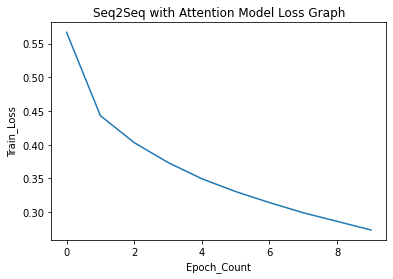

In [186]:
import matplotlib.pyplot as plt
plt.plot(loss_lst)
plt.xlabel("Epoch_Count")
plt.ylabel("Train_Loss")
plt.title("Seq2Seq with Attention Model Loss Graph")
plt.show()

### Predict hashtags

In [179]:
encoder_pred = Encoder(vocab_inp_size, embedding_dim, units, 1)
decoder_pred = Decoder(vocab_tar_size, embedding_dim, units, units,1)

encoder_pred.to(device)
decoder_pred.to(device)


Decoder(
  (embedding): Embedding(1716, 64)
  (gru): GRU(192, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1716, bias=True)
  (W1): Linear(in_features=128, out_features=128, bias=True)
  (W2): Linear(in_features=128, out_features=128, bias=True)
  (V): Linear(in_features=128, out_features=1, bias=True)
)

#### Loading weights into another model

In [180]:
encoder_pred.load_state_dict(encoder.state_dict())
decoder_pred.load_state_dict(decoder.state_dict())

<All keys matched successfully>

In [181]:
softmax = nn.Softmax(dim=1)

def predict(X_test):
  results = []
  encoder_pred.eval()
  decoder_pred.eval()

  for xs in enumerate(X_test):
    xs = xs[1]
    length = np.sum(1 - np.equal(xs, 0))
    xs = torch.tensor(xs).view(-1,1)
    length = torch.tensor(length).view(-1,)

    enc_output, enc_hidden = encoder_pred(xs.to(device), length, device)
    dec_hidden = enc_hidden
        
    dec_input = torch.tensor([[hashtag_utils.word2idx['$start']]])
    curr_hashtags = []
    # run code below till we generate "end$" tag or 10 hashtags
    for t in range(1,10):
      predictions, dec_hidden, _ = decoder_pred(dec_input.to(device), 
                                          dec_hidden.to(device), 
                                          enc_output.to(device))
      #print(predictions.size())
      top_val,top_idx  = softmax(predictions).topk(1,dim = 1)
      #print(top_idx.item())
      if top_idx == hashtag_utils.word2idx["end$"]:
        break
      pred_hashtag = hashtag_utils.idx2word[top_idx.item()]
      curr_hashtags.append(pred_hashtag)
      dec_input = torch.tensor([top_idx]).unsqueeze(1)

    results.append(curr_hashtags)

  return results

In [182]:
#predict hashtags  on test data
predicted_hashtags = predict(input_tensor_test)

In [183]:
for i in range(10):
  print(Y_test.iloc[i],predicted_hashtags[i])

$start nadiamurad denismukwege nobelprize nobelpeaceprize nobellaureate peace activism activist activists humanrights humanrightsactivist woman women girl girls rape victim victims rapevictim rapesurvivor sexualviolence genderviolence yazidi saveyazidi iraq doctor gynecologist congo congolese end$ ['woman', 'women', 'girl', 'girls', 'woman', 'women', 'girl', 'girls', 'woman']
$start giletsjaunes giletjaune 17novembre blocage yellowvests protest demonstration transport transportation traffic gas gasprices petrol diesel car cars tax taxes vehicle road roads driver drivers emmanuelmacron macron manifestation paris france french français end$ []
$start whatsyournature wildebeest wildlife kenya magicalkenya africa protectpreserve livenature naturephotography photocontest end$ []
$start vacation end$ []
$start brussels eucouncil eu2018at justislipsius sunnyday streetphotography rainbow livemusic schuman bruxellesmabelle welovebrussels end$ ['euco', 'eucouncil', 'euco', 'eucouncil', 'euco', '

In [184]:
import csv
actual = Y_test.values.tolist()
with open("file.csv","w") as f:
  writer = csv.writer(f)
  writer.writerows(zip(actual,predicted_hashtags))

## Bi-directional Model

In [185]:
'''class encoder(nn.Module):

  def _init_(self, input_size, embedding_size, hidden_size, layers, bidirectional):
    '''
    input_size = size of vocab
    embedding_size = embedding dim
    hidden_size = hidden state size
    layer = num of layers of lstms
    '''

    # The embedding layer is created using nn.Embedding, the LSTM with nn.LSTM
    super()._init_()
    # input_dim is the size/dimensionality of the one-hot vectors that will be input to the encoder. This is equal to the input (source) vocabulary size.
    # emb_dim is the dimensionality of the embedding layer. This layer converts the one-hot vectors into dense vectors with emb_dim dimensions.
    # hidden_size is the dimensionality of the hidden and cell states.
    # layers is the number of layers in the RNN.
    self.embed = nn.Embedding(num_embeddings=input_size, embedding_dim=embedding_size) # output size = (*,embedding_size)
    self.lstm = nn.LSTM(input_size=embedding_size, hidden_size= hidden_size, num_layers=layers, batch_first = True, bidirectional = bidirectional)
    self.bidirectional = bidirectional
    #in order to convert bidirectional hidden state to unidirectional if LSTM is bidirectional
    # We can just think of $c_t$ as another type of hidden state. 
    # Similar to $h_0^l$, $c_0^l$ will be initialized to a tensor of all zeros. 
    # Also, our context vector will now be both the final hidden state and the final cell state, i.e. $z^l = (h_T^l, c_T^l)$. 
    self.fc_hidden = nn.Linear(hidden_size*2, hidden_size)
    self.fc_cell = nn.Linear(hidden_size*2, hidden_size)

  def forward(self,x):
    '''
    x shape = [batch_size, sentence]
    one complete sentence represents a "sequence"
    '''
    x = self.embed(x) # shape [batch_size,  sentence, embed_size]
    output, (hidden_state, cell_state) = self.lstm(x) #shape [batch_size, seq_len, num_directions(2)*hidden_size]

    if self.bidirectional:  #since we have 2 directions so add(concat) hidden of both directions into one
      hidden = torch.cat((hidden_state[0:1], hidden_state[1:2]), dim=2)
      cell = torch.cat((cell_state[0:1], cell_state[1:2]), dim = 2) #output [1(layer), batch, hidden_size*2]
      hidden_state = self.fc_hidden(hidden)
      cell_state = self.fc_cell(cell)

    # print(output.shape, x.shape)
    #output shape = [batch_size, seq_len, 2*hidden_size] 
    #hidden shape =[1(layers), batch_size, hidden_size]
    #  RNN returns: outputs (the top-layer hidden state for each time-step), 
    # hidden (the final hidden state for each layer, $h_T$, stacked on top of each other) 
    # and cell (the final cell state for each layer, $c_T$, stacked on top of each other).
    return output, hidden_state, cell_state'''

IndentationError: ignored